In [ ]:
import numpy as np
import pandas as pd

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

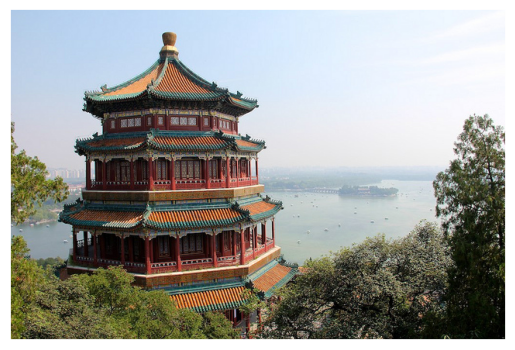

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes()
ax.set(xticks=[], yticks=[])
ax.imshow(china)

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
data = china/255
data = data.reshape(-1,3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, colors=None, N=10_000, title=None):
  if colors is None:
    colors = data

  rng = np.random.RandomState(42)
  i   = rng.permutation(data.shape[0])[:N]

  colors  = colors[i]
  R,G,B   = data[i].T

  fig,ax = plt.subplots(1,2,figsize=(16,6))
  ax[0].scatter(R, G, c=colors, s=5)
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))

  ax[1].scatter(R, B, c=colors, s=5)
  ax[1].set(xlabel='Red', ylabel='Blue' , xlim=(0,1), ylim=(0,1))

  fig.suptitle(t=title)

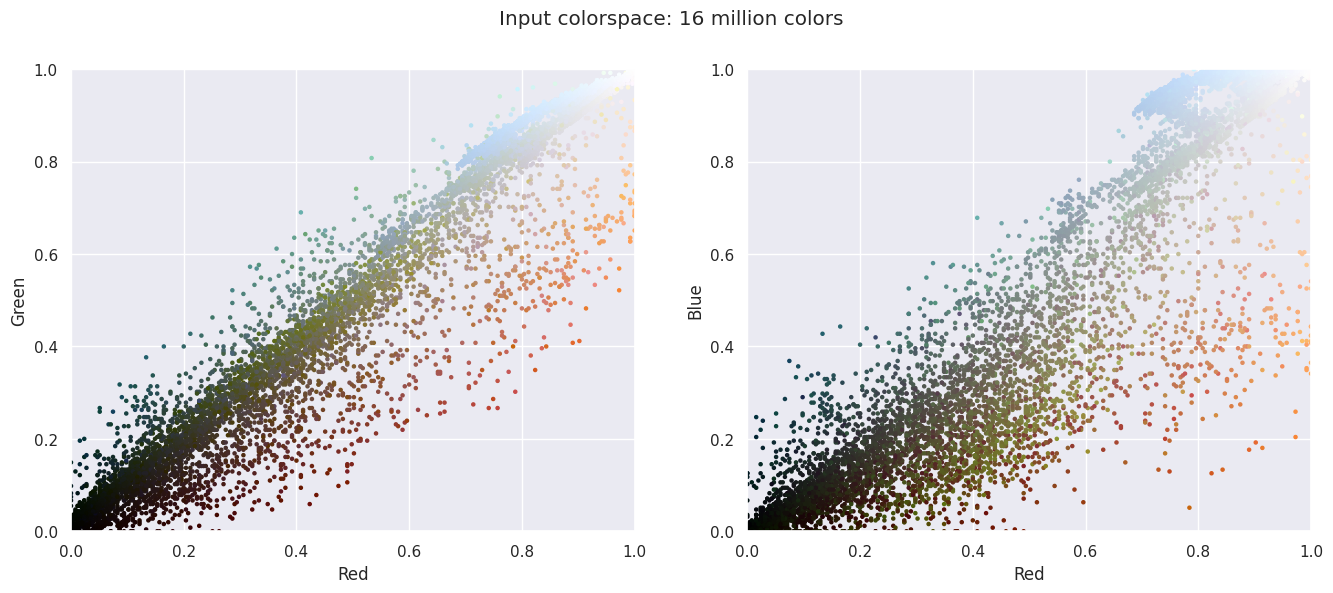

In [ ]:
plot_pixels(data, title='Input colorspace: 16 million colors')

In [ ]:
from sklearn.cluster import MiniBatchKMeans
model     = MiniBatchKMeans(n_clusters=16)
clusters  = model.fit_predict(data)
centers   = model.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
colors_new = centers[clusters]
colors_new.shape, clusters.shape

((273280, 3), (273280,))

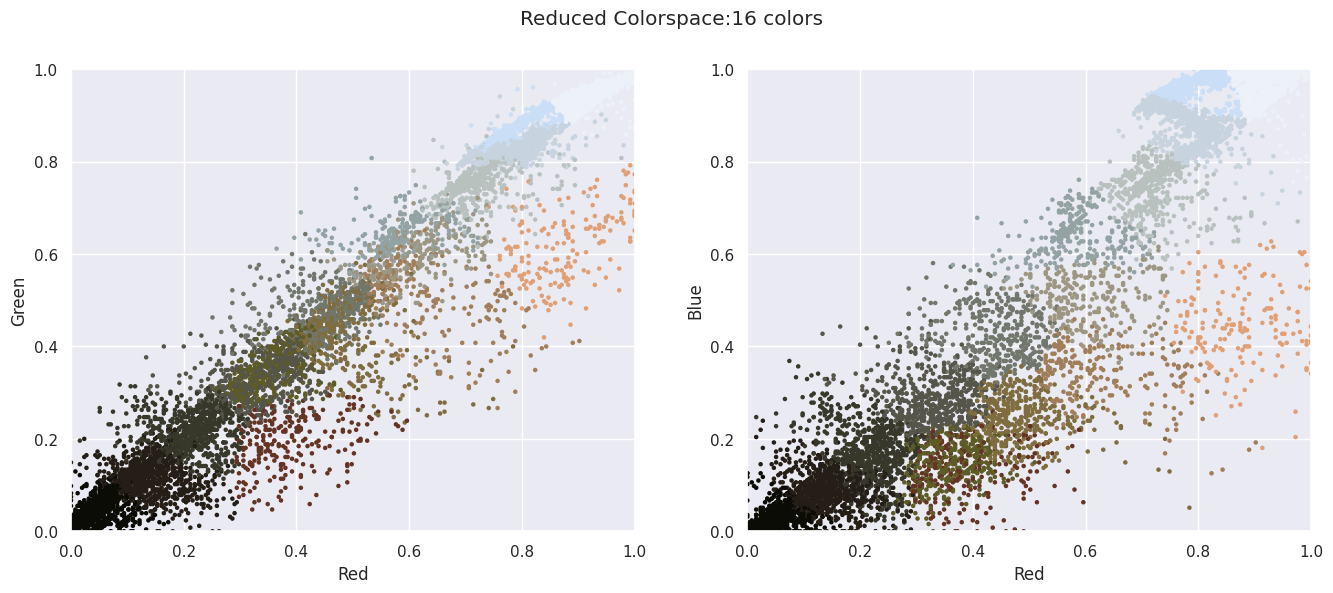

In [ ]:
plot_pixels(data, colors=colors_new, title='Reduced Colorspace:16 colors')

In [ ]:
china_new = colors_new.reshape(china.shape)
china_new.shape

(427, 640, 3)

Text(0.5, 1.0, '16 color image')

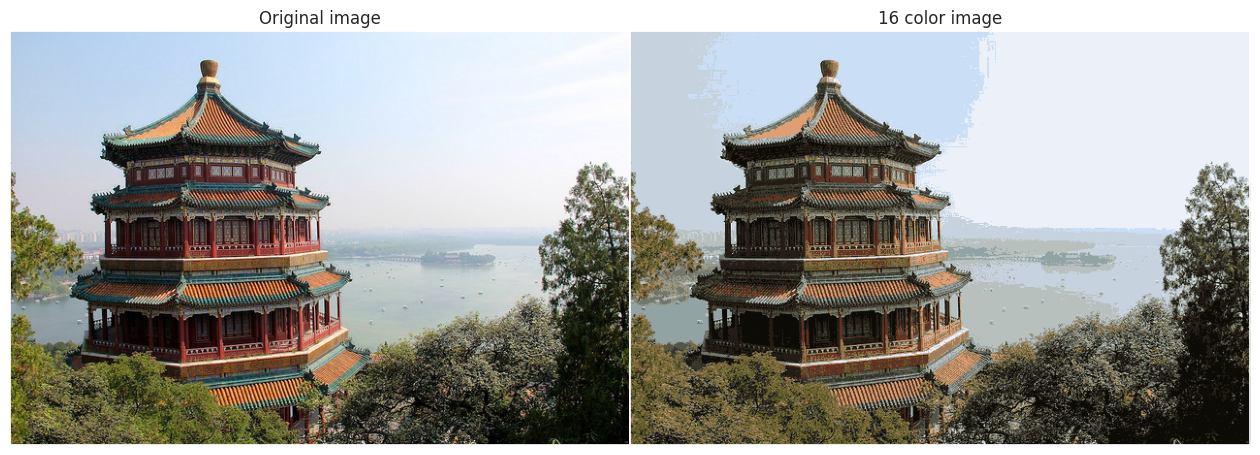

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,6),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0, wspace=0))
ax[0].imshow(china)
ax[0].set_title('Original image')
ax[1].imshow(china_new)
ax[1].set_title('16 color image')